<a href="https://colab.research.google.com/github/nidhaloff/keras_fashionMNIST/blob/master/keras_fashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import keras
from keras import backend as K
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# run keras model on google GPU
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [35]:
# load dataset
dataset = keras.datasets.fashion_mnist.load_data()
train_data, test_data = dataset
X_train, y_train = train_data
X_test, y_test = test_data
print(X_train.shape, type(X_train))

(60000, 28, 28) <class 'numpy.ndarray'>


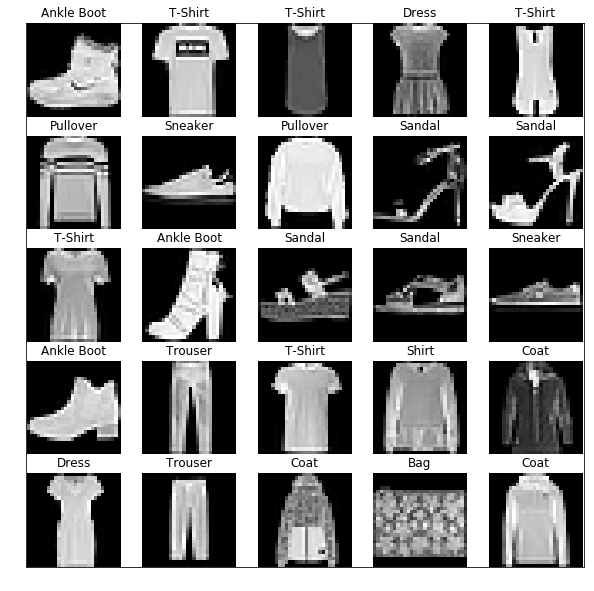

In [36]:
# visualize Data

labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

def plot_image(dataset, index, color='gray'):
    plt.imshow(dataset[index], cmap=color)
    plt.show()

def plot_figures(dataset, labels, color="gray"):
    fig = plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])
    rows = 5
    cols = 5
    for i in range(rows*cols):
        fig.add_subplot(5, 5, i+1)
        plt.axis('off')
        plt.title(labels_map[labels[i]])
        plt.imshow(dataset[i], cmap=color)
    plt.show()
    
plot_figures(dataset=X_train, labels=y_train)

In [0]:
# normalize data
X_train, X_test = X_train/255, X_test/255

In [0]:
# declare the model
model = keras.Sequential([
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
    
])


In [0]:
# compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 177us/step - loss: 0.5113 - acc: 0.8181 - val_loss: 0.4057 - val_acc: 0.8558
Epoch 2/20
48000/48000 [==============================] - 8s 169us/step - loss: 0.3726 - acc: 0.8641 - val_loss: 0.3702 - val_acc: 0.8627
Epoch 3/20
48000/48000 [==============================] - 8s 166us/step - loss: 0.3361 - acc: 0.8769 - val_loss: 0.3453 - val_acc: 0.8731
Epoch 4/20
48000/48000 [==============================] - 8s 168us/step - loss: 0.3130 - acc: 0.8843 - val_loss: 0.3406 - val_acc: 0.8784
Epoch 5/20
48000/48000 [==============================] - 8s 167us/step - loss: 0.2975 - acc: 0.8894 - val_loss: 0.3458 - val_acc: 0.8735
Epoch 6/20
48000/48000 [==============================] - 8s 167us/step - loss: 0.2807 - acc: 0.8951 - val_loss: 0.3285 - val_acc: 0.8817
Epoch 7/20
48000/48000 [==============================] - 8s 165us/step - loss: 0.2696 - acc: 0.8990 - val_loss: 0.3181 - 

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"loss: {loss} and acuuracy on test data: {accuracy*100}%")

10000/10000 [==============================] - 1s 68us/step
loss: 0.3810246640264988 and acuuracy on test data: 88.5%


In [42]:
# evaluate the Model
y_pred = model.predict(X_test)
predictions = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
predictions = (predictions == y_test)
predictions = [1 if x == True else 0 for x in predictions]
correct_preds, false_preds = predictions.count(1), predictions.count(0)
print(f" Number of Correct predictions of the Model = {correct_preds} and Number of false predictions= {false_preds}")

 Number of Correct predictions of the Model = 8850 and Number of false predictions= 1150


In [0]:
def plot_test_image(i, predictions_array, true_label, img):
    pred_arr, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(pred_arr)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(labels_map[predicted_label],
                                100*np.max(pred_arr),
                                labels_map[true_label]),
                                color=color)

In [0]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

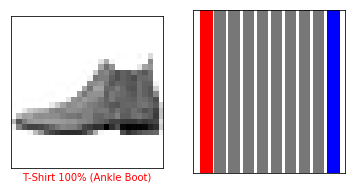

In [53]:
# test example:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_test_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

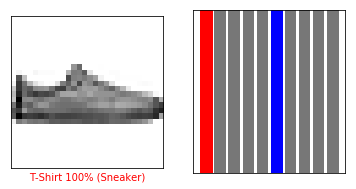

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_test_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_train)
plt.show()

In [56]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

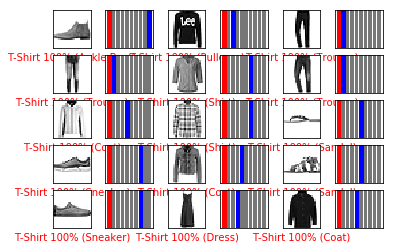

In [57]:
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_test_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)
plt.show()

In [68]:
# Grab an image from the test dataset
img = X_test[0]

print(img.shape)

(28, 28)


In [69]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [70]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.6041802e-09 9.0392996e-06 1.8329981e-10 9.6933981e-08 6.5074446e-11
  8.7659710e-06 5.8292962e-08 4.8069918e-04 1.3398222e-11 9.9950135e-01]]


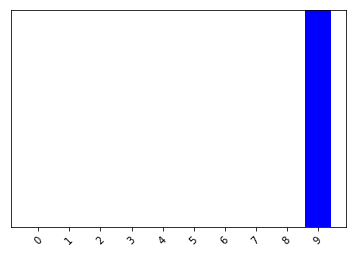

In [73]:
plot_value_array(0, predictions_single, y_test)
plt.xticks(range(10), labels_map, rotation=45)
plt.show()

In [74]:
# look whether the prediction was right
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
